## This notebook simulates a flock of birds using the Boid model

#### create the dataset in pytorch format
Positions: (rollout steps ahead, number of boids, 2)
ex: (100 frames, 20 boids, 2 dimensions)

Species: a list of num_boid entries of each boid’s identity, (number of boids)
ex: ['goose', 'goose', 'crane', 'crane', 'crane']

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
from torch_geometric.data import DataLoader

In [ ]:
import os

from collab_env.data.file_utils import expand_path, get_project_root

# our code
from collab_env.sim.boids_gnn_temp.animal_simulation import (
    AnimalTrajectoryDataset,
    visualize_graph,
)
from collab_env.sim.boids_gnn_temp.boid import init_multi_species_boids, update_boids

# %%


smoke_test = "CI" in os.environ
steps = 800 if not smoke_test else 10
save_file = True
num_samples = 1000
# %%

In [6]:
species_configs = {  # different spieces should have a different set of values for all the parameters
    # but the parameter name should all be the same for one updating algorithms.
    "A": {
        "visual_range": 50,
        "centering_factor": 0.005,
        "min_distance": 15,
        "avoid_factor": 0.05,
        "matching_factor": 0.5,
        "margin": 5,  # 0.05, 25
        "turn_factor": 10,
        "speed_limit": 7,
        "counts": 20,
        "independent": False,
    }
}

dataset = AnimalTrajectoryDataset(
    init_multi_species_boids,
    update_boids,
    species_configs,
    width=480,
    height=480,
    steps=steps,
    num_samples=num_samples,
    seed=2025,
)

if save_file:

    torch.save(
        dataset,
        expand_path(
            "simulated_data/boid_single_species_basic_large.pt", get_project_root()
        ),
    )
    torch.save(
        species_configs,
        expand_path(
            "simulated_data/boid_single_species_basic_large_config.pt",
            get_project_root(),
        ),
    )

### (ablation dataset) weak alignment

In [7]:
species_configs["A"]["matching_factor"] = 0.01

dataset = AnimalTrajectoryDataset(
    init_multi_species_boids,
    update_boids,
    species_configs,
    width=480,
    height=480,
    steps=steps,
    num_samples=num_samples,
    seed=2025,
)

if save_file:
    torch.save(
        dataset,
        expand_path(
            "simulated_data/boid_single_species_weakalignment_large.pt",
            get_project_root(),
        ),
    )
    torch.save(
        species_configs,
        expand_path(
            "simulated_data/boid_single_species_weakalignment_large_config.pt",
            get_project_root(),
        ),
    )

### (ablation dataset) no repulsion

In [8]:
species_configs["A"]["avoid_factor"] = 0

dataset = AnimalTrajectoryDataset(
    init_multi_species_boids,
    update_boids,
    species_configs,
    width=480,
    height=480,
    steps=steps,
    num_samples=num_samples,
    seed=2025,
)

if save_file:
    torch.save(
        dataset,
        expand_path(
            "simulated_data/boid_single_species_norepulsion_large.pt",
            get_project_root(),
        ),
    )
    torch.save(
        species_configs,
        expand_path(
            "simulated_data/boid_single_species_norepulsion_large_config.pt",
            get_project_root(),
        ),
    )

### independent

In [9]:
species_configs = {  # different spieces should have a different set of values for all the parameters
    # but the parameter name should all be the same for one updating algorithms.
    "A": {
        "visual_range": 50,
        "centering_factor": 0.005,
        "min_distance": 15,
        "avoid_factor": 0.05,
        "matching_factor": 0.5,
        "margin": 5,  # 0.05, 25
        "turn_factor": 10,
        "speed_limit": 7,
        "counts": 20,
        "independent": True,
    }
}

dataset = AnimalTrajectoryDataset(
    init_multi_species_boids,
    update_boids,
    species_configs,
    width=480,
    height=480,
    steps=steps,
    num_samples=num_samples,
    seed=2025,
)

if save_file:
    torch.save(
        dataset,
        expand_path(
            "simulated_data/boid_single_species_independent_large.pt",
            get_project_root(),
        ),
    )
    torch.save(
        species_configs,
        expand_path(
            "simulated_data/boid_single_species_independent_large_config.pt",
            get_project_root(),
        ),
    )

### strong alignment

In [10]:
species_configs["A"]["matching_factor"] = 1

dataset = AnimalTrajectoryDataset(
    init_multi_species_boids,
    update_boids,
    species_configs,
    width=480,
    height=480,
    steps=steps,
    num_samples=50,
    seed=2025,
)

torch.save(
    dataset,
    expand_path(
        "simulated_data/boid_single_species_strong_alignment.pt", get_project_root()
    ),
)
torch.save(
    species_configs,
    expand_path(
        "simulated_data/boid_single_species_strong_alignment_config.pt",
        get_project_root(),
    ),
)

### Plot data

In [13]:
# file_name = 'boid_food_basic_alignment.pt'
# config_name = 'boid_food_basic_alignment_config.pt'

file_name = "boid_single_species_basic.pt"
config_name = "boid_single_species_basic_config.pt"

# file_name = 'boid_single_species_independent.pt'
# config_name = 'boid_single_species_independent_config.pt'

dataset = torch.load(
    expand_path("simulated_data/" + file_name, get_project_root()),
    weights_only=False,
)
species_configs = torch.load(
    expand_path("simulated_data/" + config_name, get_project_root()),
    weights_only=False,
)

In [14]:
batch_size = 1
loader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

batch = next(iter(loader))
p, species = batch

print("made", str(len(list(loader))), "batches, each of size", str(batch_size))  #
print("Positions:", p.shape)  # [B, steps, N, 2]
print("Species labels:", species.shape)  # [B, N]
print("\n")

made 50 batches, each of size 1
Positions: torch.Size([1, 10, 20, 2])
Species labels: torch.Size([1, 20])




/Users/dima/git/collab-environment/.venv-310/lib/python3.10/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


### Visualize boids

p0 shape torch.Size([20, 2])
p shape torch.Size([10, 20, 2])


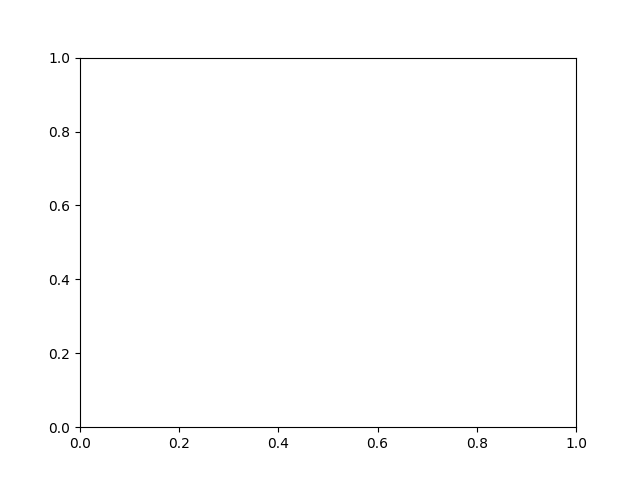

In [15]:
%matplotlib widget
global ani

file_id = 7
batch = list(iter(loader))[file_id]
p, species = batch
v = torch.diff(p, dim=1)

_, F, _2, dim = p.shape
starting_frame = int(round(3 * F / 4))
ani, _ = visualize_graph(
    p[0, :],
    v[0],
    # species=species,
    batch=None,
    starting_frame=0,
    file_id=0,
    # ending_frame=1000,
)